In [437]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [438]:
datafile = 'ex1data1.txt'
X ,y= np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.matrix(X))
y = np.transpose(np.matrix(y))
X = np.insert(X,0,1,axis=1)

Text(0.5,0,'Population of City in 10,000s')

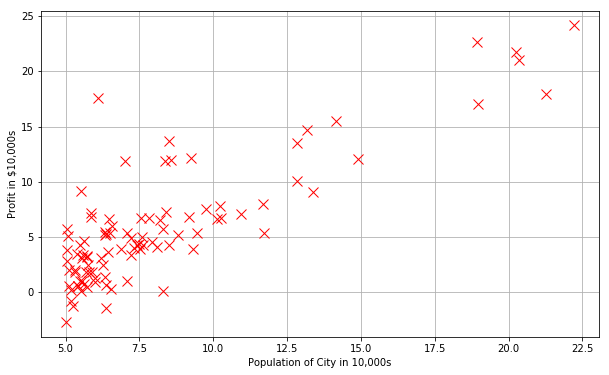

In [439]:
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10)
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')


In [456]:
iterations = 1500
alpha = 0.01
theta=[[0],[0]]

In [457]:
def computeCost(X, y, theta):
    m = y.size
    J = 0
    J=np.sum(np.power(np.matmul(X,theta)-y,2))/(2*m)
    
    return J
    


In [458]:
computeCost(X,y,theta)

32.072733877455676

In [460]:
computeCost(X,y,[[-1],[2]])

54.242455082012377

In [461]:
def h(x,theta):
    return np.matmul(x,theta)

In [465]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = y.size
    J = []
    for i in range(iterations):
        th0 = theta[0][0]-alpha*(1/m)*np.sum(h(X,theta)-y)
        th1 = theta[1][0]-alpha*(1/m)*np.sum((np.multiply(h(X,theta)-y,X[:,1])))
        theta[0][0]= th0
        theta[1][0]= th1
#         theta= theta- (((np.matmul(np.transpose(X),(np.matmul(X,theta)-y)))*alpha)/m) #alternative 
#         J.append(computeCost(X,y,theta))
    
    return theta

In [467]:
theta=gradientDescent(X, y, [[0],[0]], alpha, iterations)


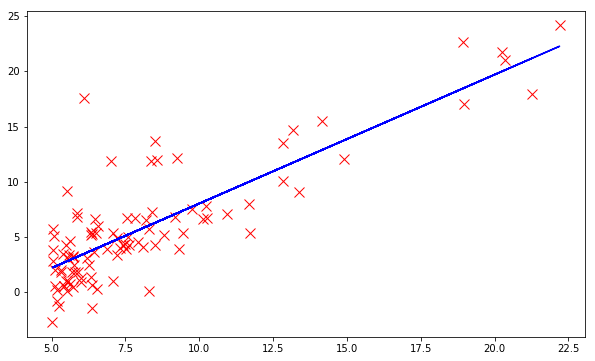

In [468]:
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y,'rx',markersize=10)
plt.plot(X[:,1],np.matmul(X,theta),'b-',markersize=10)

In [469]:
predict1=np.matmul([1,5.3],theta)
print('For population = 35,000, we predict a profit of ',predict1[0]*10000)
predict2=np.matmul([1,7],theta)
print('For population = 70,000, we predict a profit of ',predict2[0]*10000)

For population = 35,000, we predict a profit of  25514.2901737
For population = 70,000, we predict a profit of  45342.4501294


In [689]:
theta0_vals=np.linspace(-10,10,num=100)
theta1_vals=np.linspace(-1,4,num=100)
dm=[]
sm=[]
am=[]
J_vals=np.zeros((theta0_vals.size,theta1_vals.size))

array([[ 328.09290555,  316.6648683 ,  305.44447299, ...,  186.35412584,
         195.06735595,  203.98822799],
       [ 323.26504192,  311.92025945,  300.7831189 , ...,  189.60197489,
         198.39845977,  207.40258658],
       [ 318.47799046,  307.21646275,  296.16257698, ...,  192.89063611,
         201.77037576,  210.85775734],
       ..., 
       [  49.81156018,   46.45923561,   43.31455298, ...,  691.41691065,
         708.20585345,  725.20243817],
       [  48.94247627,   45.67340647,   42.61197861, ...,  698.62353943,
         715.49573699,  732.57557648],
       [  48.11420452,   44.9283895 ,   41.95021641, ...,  705.87098036,
         722.82643269,  739.98952696]])

In [690]:
for i in range(theta0_vals.size):
    for j in range(theta1_vals.size):
        dm.append(theta0_vals[i])
        sm.append(theta1_vals[j])
        
        t= [[theta0_vals[i]],[theta1_vals[j]]]
        f=computeCost(X,y,t)
        am.append(f)
        J_vals[i][j]=f

In [691]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [692]:
J_vals = np.transpose(J_vals)

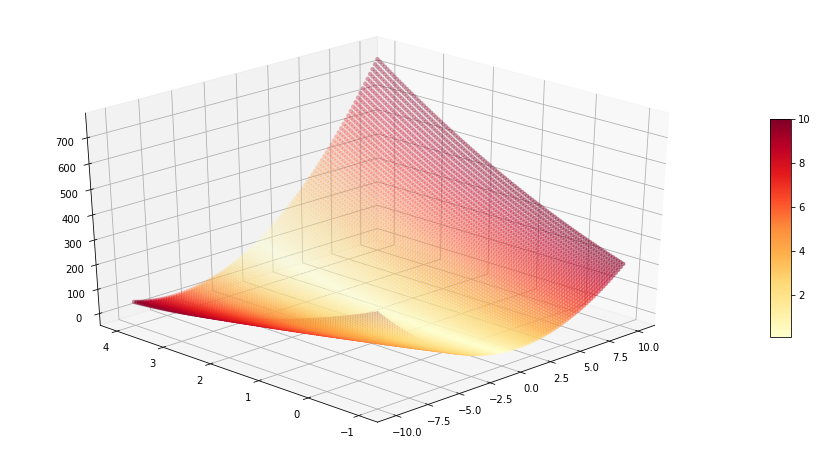

In [694]:

fig =plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')
ax.view_init(30, 225)
surf = ax.scatter(dm, sm, J_vals ,c=np.abs(dm),cmap=plt.get_cmap('YlOrRd'), linewidth=0, antialiased=True)

    # Add a color bar which maps values to colors.

fig.colorbar(surf, shrink=.5, aspect=10)
plt.show()

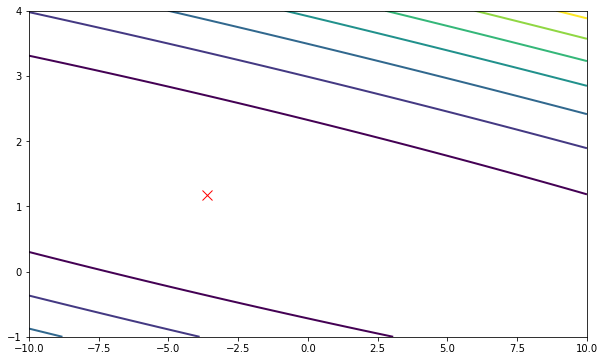

In [695]:
plt.figure(figsize=(10,6))
plt.contour(theta0_vals, theta1_vals, J_vals,linewidths=2)
plt.plot(theta[0][0],theta[1][0],'rx',markersize=10)